In [3]:
!nvidia-smi

Wed Sep 10 11:35:21 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.247.01             Driver Version: 535.247.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX 4000 Ada Gene...    Off | 00000000:01:00.0 Off |                  Off |
| 30%   30C    P8              13W / 130W |     30MiB / 20475MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import os

HOME = os.getcwd()
HOME

'/home/abbal179/sports-analytics/code'

In [ ]:
!pip install ultralytics roboflow

In [2]:
from roboflow import Roboflow
from IPython.display import Image
from dotenv import load_dotenv
from ultralytics import YOLO

## Pull dataset

In [7]:
load_dotenv()

ROBOFLOW_API_KEY = os.getenv("ROBOFLOW_API_KEY")
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(11)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-11 in yolov8:: 100%|██████████| 756/756 [00:03<00:00, 204.83it/s]


In [8]:
# Update data.yaml structure to align with the latest requirements of the ultralytics package.

!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml

## Finetuning

In [9]:
os.chdir(HOME)
os.makedirs(f"{HOME}/models/yolo_finetuned_640imgs_20batch", exist_ok=True)

In [ ]:
%%time

model_640 = YOLO('yolov8x.pt')

results_640 = model_640.train(
    data=f"{dataset.location}/data.yaml",
    epochs=50,
    imgsz=640,
    batch=20,
    plots=True,
    name="train_640_batch20"
)

New https://pypi.org/project/ultralytics/8.3.197 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.2 torch-2.2.1 CUDA:0 (NVIDIA RTX 4000 Ada Generation, 20145MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/home/abbal179/sports-analytics/code/football-players-detection-11/data.yaml, epochs=50, time=None, patience=100, batch=20, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train_640_batch20, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms

train: Scanning /home/abbal179/sports-analytics/code/football-players-detection-11/train/labels... 298 images, 0 backgrounds, 0 corrupt: 100%|██████████| 298/298 [00:00<00:00, 1181.71it/s]

train: New cache created: /home/abbal179/sports-analytics/code/football-players-detection-11/train/labels.cache



val: Scanning /home/abbal179/sports-analytics/code/football-players-detection-11/valid/labels... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<00:00, 1253.99it/s]

val: New cache created: /home/abbal179/sports-analytics/code/football-players-detection-11/valid/labels.cache


Plotting labels to runs/detect/train_640_batch20/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00046875), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train_640_batch20
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      15.8G       1.37      2.805     0.8886        542        640: 100%|██████████| 15/15 [00:10<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         49       1174      0.947      0.219      0.241      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      16.4G      1.121     0.8726      0.836        465        640: 100%|██████████| 15/15 [00:10<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         49       1174   0.000193    0.00316   9.92e-05   7.52e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      16.9G      1.149     0.7426     0.8344        657        640: 100%|██████████| 15/15 [00:10<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         49       1174   0.000177    0.00257   8.95e-05   2.05e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      16.4G      1.104     0.7154     0.8301        406        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         49       1174     0.0978     0.0538     0.0569     0.0208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50        17G      1.129     0.7375     0.8255        712        640: 100%|██████████| 15/15 [00:10<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         49       1174     0.0104       0.06    0.00411    0.00236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      16.4G      1.202     0.7187     0.8328        554        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         49       1174      0.283       0.22      0.106     0.0595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      16.6G      1.173     0.7112     0.8357        525        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         49       1174      0.629      0.179      0.264      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      16.6G      1.366     0.8639     0.8744        487        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         49       1174     0.0061    0.00565    0.00312    0.00178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      16.4G      1.179     0.6672     0.8347        483        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         49       1174      0.264     0.0479      0.146     0.0738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      16.6G      1.056     0.6044     0.8218        339        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174      0.643      0.311      0.405      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      16.2G      1.038     0.5807     0.8233        569        640: 100%|██████████| 15/15 [00:10<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         49       1174      0.549      0.558       0.57      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      16.5G      1.074     0.6042     0.8237        636        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174      0.771      0.636       0.72      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      16.4G      1.175     0.6941     0.8247        778        640: 100%|██████████| 15/15 [00:10<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         49       1174      0.874      0.722      0.765       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      16.4G       1.09     0.6429     0.8206        550        640: 100%|██████████| 15/15 [00:10<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         49       1174       0.82      0.686      0.724      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      16.4G      1.004     0.5463     0.8138        556        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174      0.826      0.742      0.776      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      16.5G     0.9798      0.531      0.814        609        640: 100%|██████████| 15/15 [00:10<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         49       1174      0.861      0.697      0.754      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      16.4G     0.9958     0.5373     0.8113        505        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         49       1174      0.874      0.714      0.757      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      16.4G      1.002     0.5417     0.8096        458        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         49       1174      0.857      0.695      0.764      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      16.6G      1.027     0.5393     0.8153        678        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         49       1174      0.869      0.692      0.745      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      16.5G     0.9615      0.513     0.8107        662        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         49       1174      0.868      0.682      0.758      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      16.4G     0.9372     0.4896     0.8057        519        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         49       1174      0.884       0.72      0.769      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      16.4G     0.9512     0.4869     0.8057        626        640: 100%|██████████| 15/15 [00:10<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         49       1174       0.84      0.741      0.762      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      16.5G     0.9274     0.4799     0.8056        438        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174      0.798      0.717      0.766      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      16.4G     0.9075     0.4714     0.8063        599        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         49       1174      0.835      0.678      0.734      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      16.4G     0.8971     0.4695     0.8075        799        640: 100%|██████████| 15/15 [00:10<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         49       1174      0.878      0.721      0.801      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      16.4G     0.8727     0.4513     0.8016        635        640: 100%|██████████| 15/15 [00:10<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174      0.862      0.721       0.78      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      16.6G     0.8769     0.4495     0.8048        497        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         49       1174      0.841      0.717      0.776      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      16.5G     0.9336     0.4774     0.8025        563        640: 100%|██████████| 15/15 [00:10<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         49       1174       0.82      0.689      0.761        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      16.7G     0.8736     0.4589      0.801        719        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174      0.822      0.725      0.771      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      16.2G     0.8818     0.4512     0.8021        814        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         49       1174      0.836      0.718      0.784       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      16.4G     0.8583     0.4399     0.8027        482        640: 100%|██████████| 15/15 [00:10<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174      0.909      0.701      0.797      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      16.4G     0.8862     0.4465      0.799        628        640: 100%|██████████| 15/15 [00:10<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174      0.922      0.722       0.81       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      16.4G     0.9027      0.451     0.8037        511        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174      0.894      0.737      0.798      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      16.7G     0.8786     0.4363     0.7997        556        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         49       1174      0.853      0.731      0.791       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      16.4G     0.8188     0.4223     0.7956        604        640: 100%|██████████| 15/15 [00:10<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174        0.9      0.738      0.813      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      16.2G     0.8083     0.4081     0.7975        440        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174        0.9      0.769      0.832      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      16.5G     0.8302     0.4202     0.7939        632        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174      0.909      0.748      0.818       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      16.4G     0.8045     0.4063     0.7965        595        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174       0.91      0.777      0.831      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      16.4G      0.845      0.412     0.7954        701        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174      0.883      0.756      0.815      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      16.4G     0.8699     0.4233     0.7987        690        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174      0.901      0.753      0.815      0.563


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      16.6G     0.7541     0.3837     0.8004        423        640: 100%|██████████| 15/15 [00:10<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174      0.895      0.786      0.829      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      16.6G     0.7273     0.3719     0.7963        403        640: 100%|██████████| 15/15 [00:10<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174      0.905      0.754      0.814      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      16.6G     0.7196     0.3676     0.7953        426        640: 100%|██████████| 15/15 [00:10<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174      0.936      0.752      0.813      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      16.6G     0.7148     0.3681     0.7957        413        640: 100%|██████████| 15/15 [00:10<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         49       1174      0.943      0.757      0.821      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      16.6G     0.7052     0.3605      0.793        425        640: 100%|██████████| 15/15 [00:10<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174      0.946      0.767      0.821      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      16.6G     0.7244     0.3627     0.7904        414        640: 100%|██████████| 15/15 [00:10<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174       0.95      0.768      0.825      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      16.6G     0.6929     0.3515     0.7916        421        640: 100%|██████████| 15/15 [00:10<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         49       1174      0.936      0.772      0.832      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      16.6G     0.6931       0.35     0.7894        416        640: 100%|██████████| 15/15 [00:10<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174       0.92      0.779      0.825      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      16.6G     0.6702     0.3419      0.788        413        640: 100%|██████████| 15/15 [00:10<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174      0.916      0.778      0.827      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      16.6G     0.6739     0.3377      0.789        425        640: 100%|██████████| 15/15 [00:10<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1174      0.932      0.769      0.828      0.588



50 epochs completed in 0.316 hours.
Optimizer stripped from runs/detect/train_640_batch20/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train_640_batch20/weights/best.pt, 136.7MB

Validating runs/detect/train_640_batch20/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.12.2 torch-2.2.1 CUDA:0 (NVIDIA RTX 4000 Ada Generation, 20145MiB)
Model summary (fused): 268 layers, 68,127,420 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]


                   all         49       1174      0.938      0.771      0.832      0.589
                  ball         45         45      0.996      0.356      0.445      0.199
            goalkeeper         38         39      0.944      0.865      0.946      0.695
                player         49        973      0.938      0.966      0.985      0.801
               referee         49        117      0.874      0.897      0.952      0.659
Speed: 0.1ms preprocess, 10.5ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/train_640_batch20
CPU times: user 8min 10s, sys: 2min 16s, total: 10min 27s
Wall time: 19min 18s


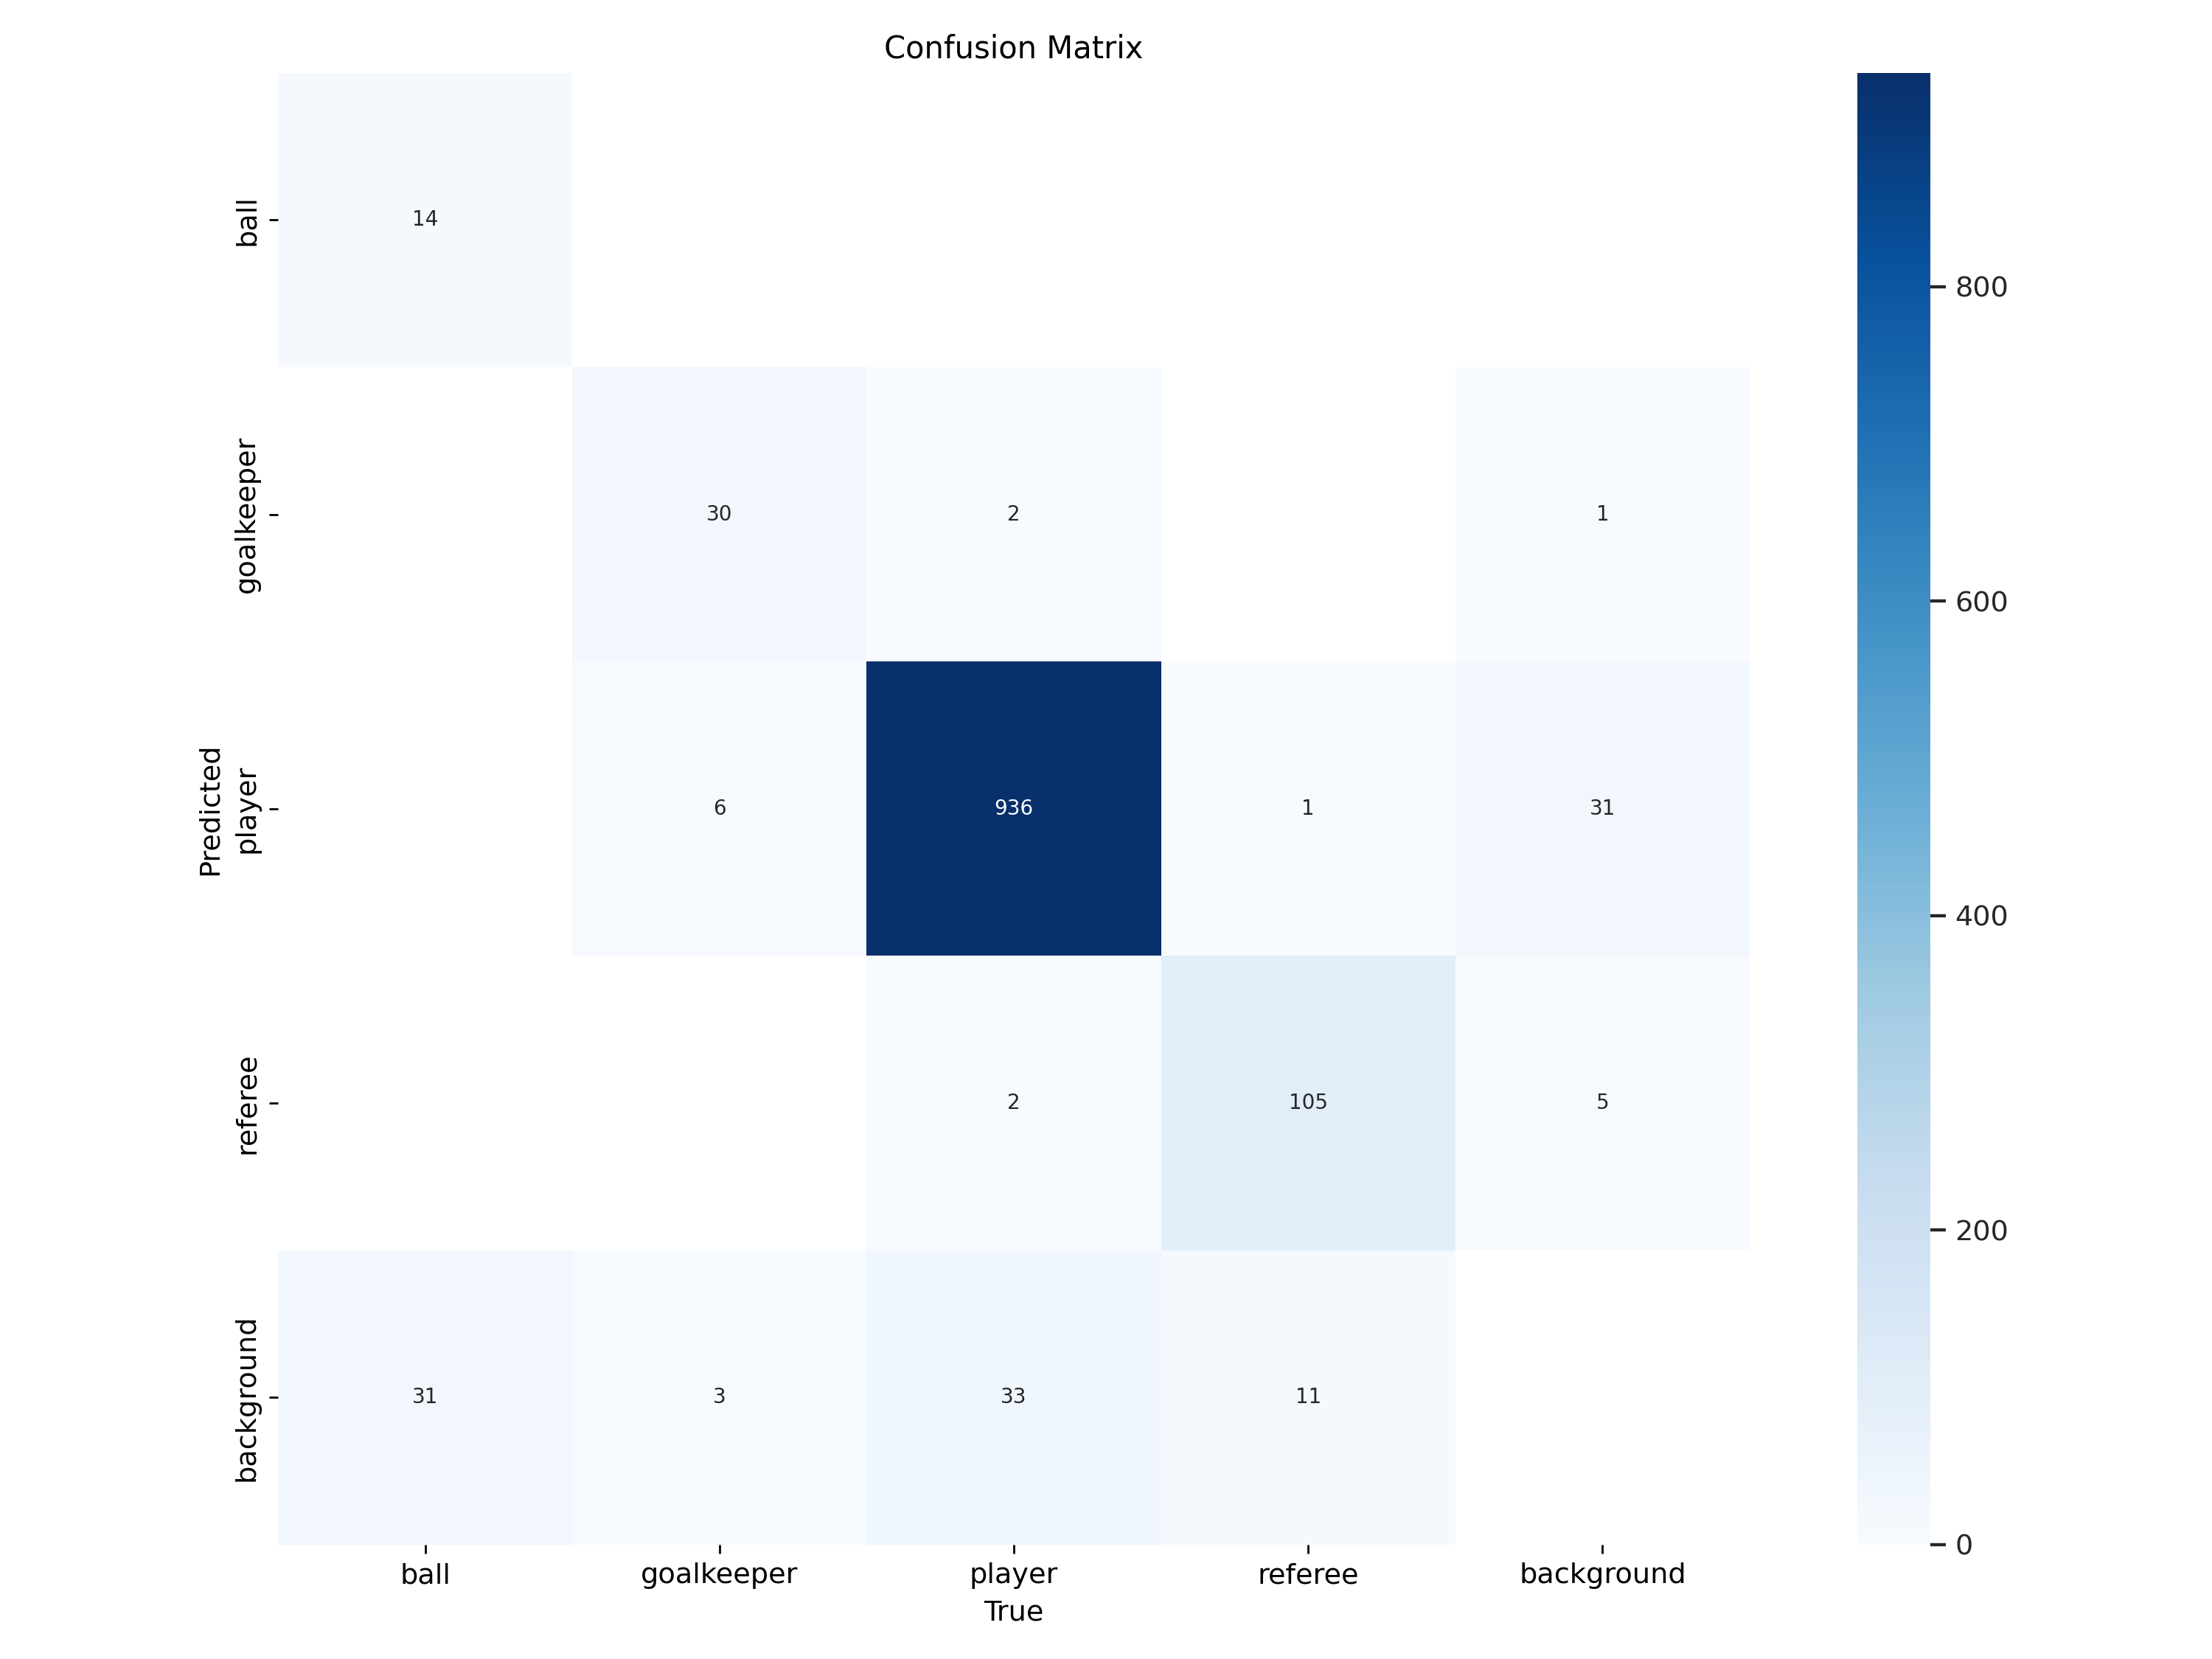

In [21]:
Image(filename="runs/detect/train_640_batch20/confusion_matrix.png", width=600)

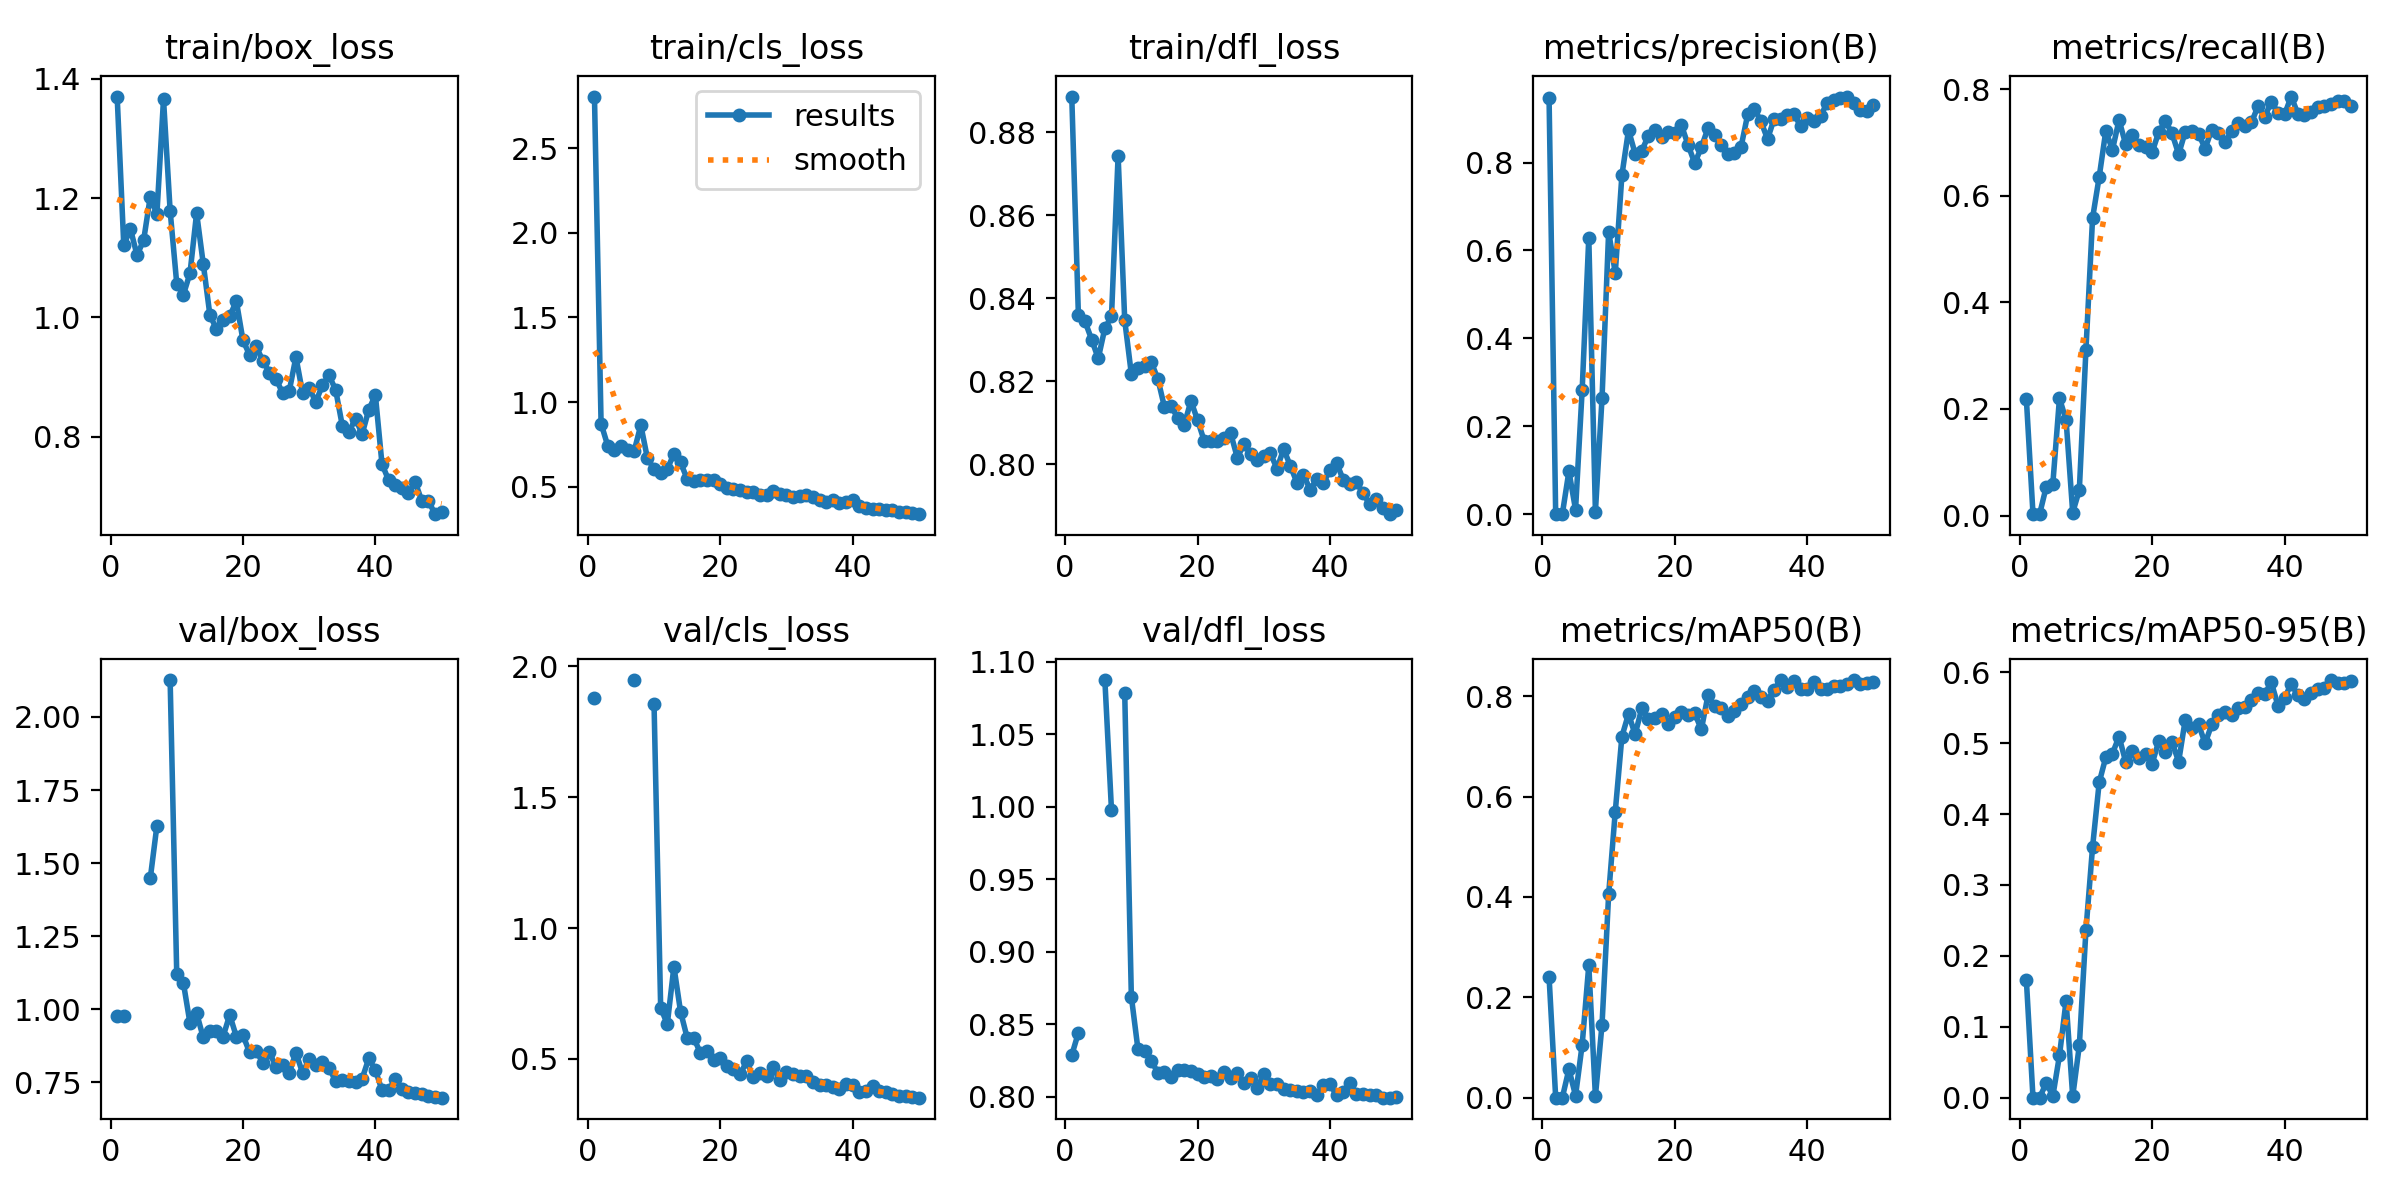

In [23]:
Image(filename="runs/detect/train_640_batch20/results.png", width=600)

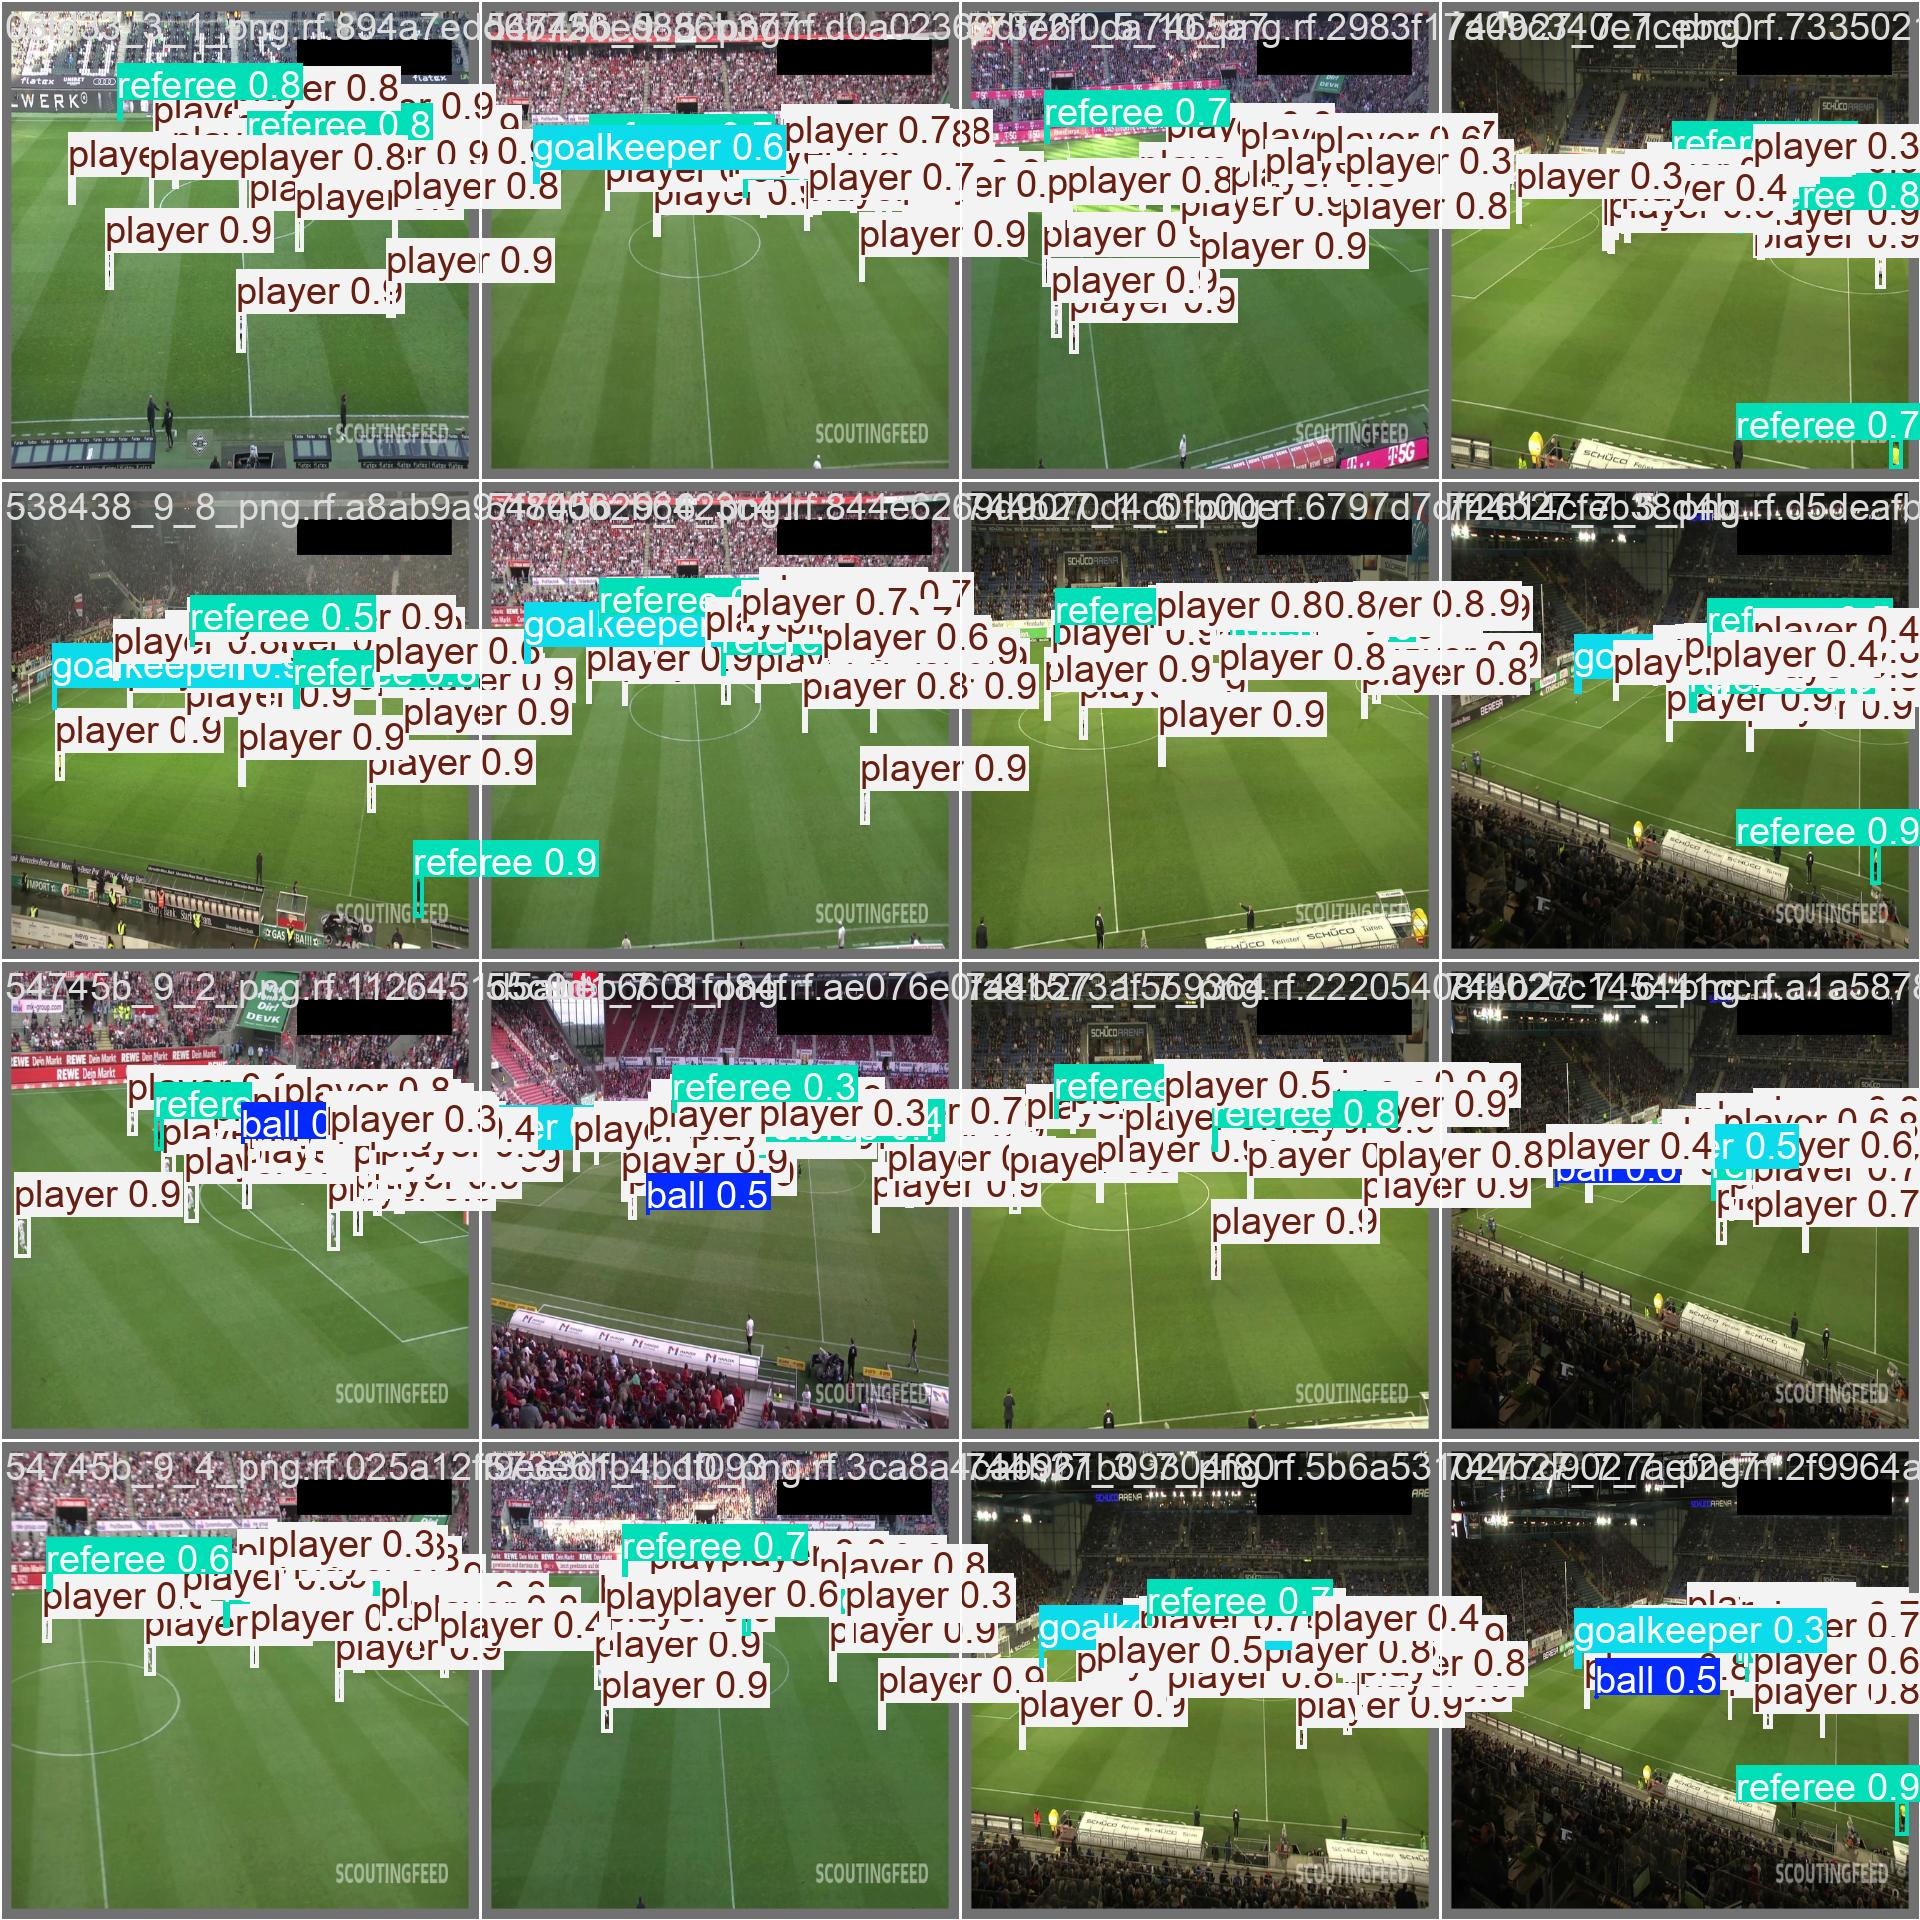

In [25]:
Image(filename="runs/detect/train_640_batch20/val_batch0_pred.jpg", width=600)

### Save model

In [15]:
!cp runs/detect/train_640_batch20/weights/best.pt models/yolo_finetuned_640imgs_20batch/best.pt

## Validate finetuned model

In [29]:
# Load saved model for validation
model_640_val = YOLO("models/yolo_finetuned_640imgs_20batch/best.pt")

val_results_640 = model_640_val.val(
    data=f"{dataset.location}/data.yaml",
    imgsz=640,
    name="train_640_batch20/val"
)

Ultralytics 8.3.40 🚀 Python-3.12.2 torch-2.2.1 CUDA:0 (NVIDIA RTX 4000 Ada Generation, 20145MiB)
Model summary (fused): 268 layers, 68,127,420 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /home/abbal179/sports-analytics/code/football-players-detection-11/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]


                   all         49       1174      0.938      0.771       0.83      0.596
                  ball         45         45      0.991      0.356      0.444      0.202
            goalkeeper         38         39      0.944      0.866      0.937      0.707
                player         49        973      0.937      0.966      0.985      0.815
               referee         49        117      0.878      0.897      0.953       0.66
Speed: 0.1ms preprocess, 21.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train_640_batch20/val


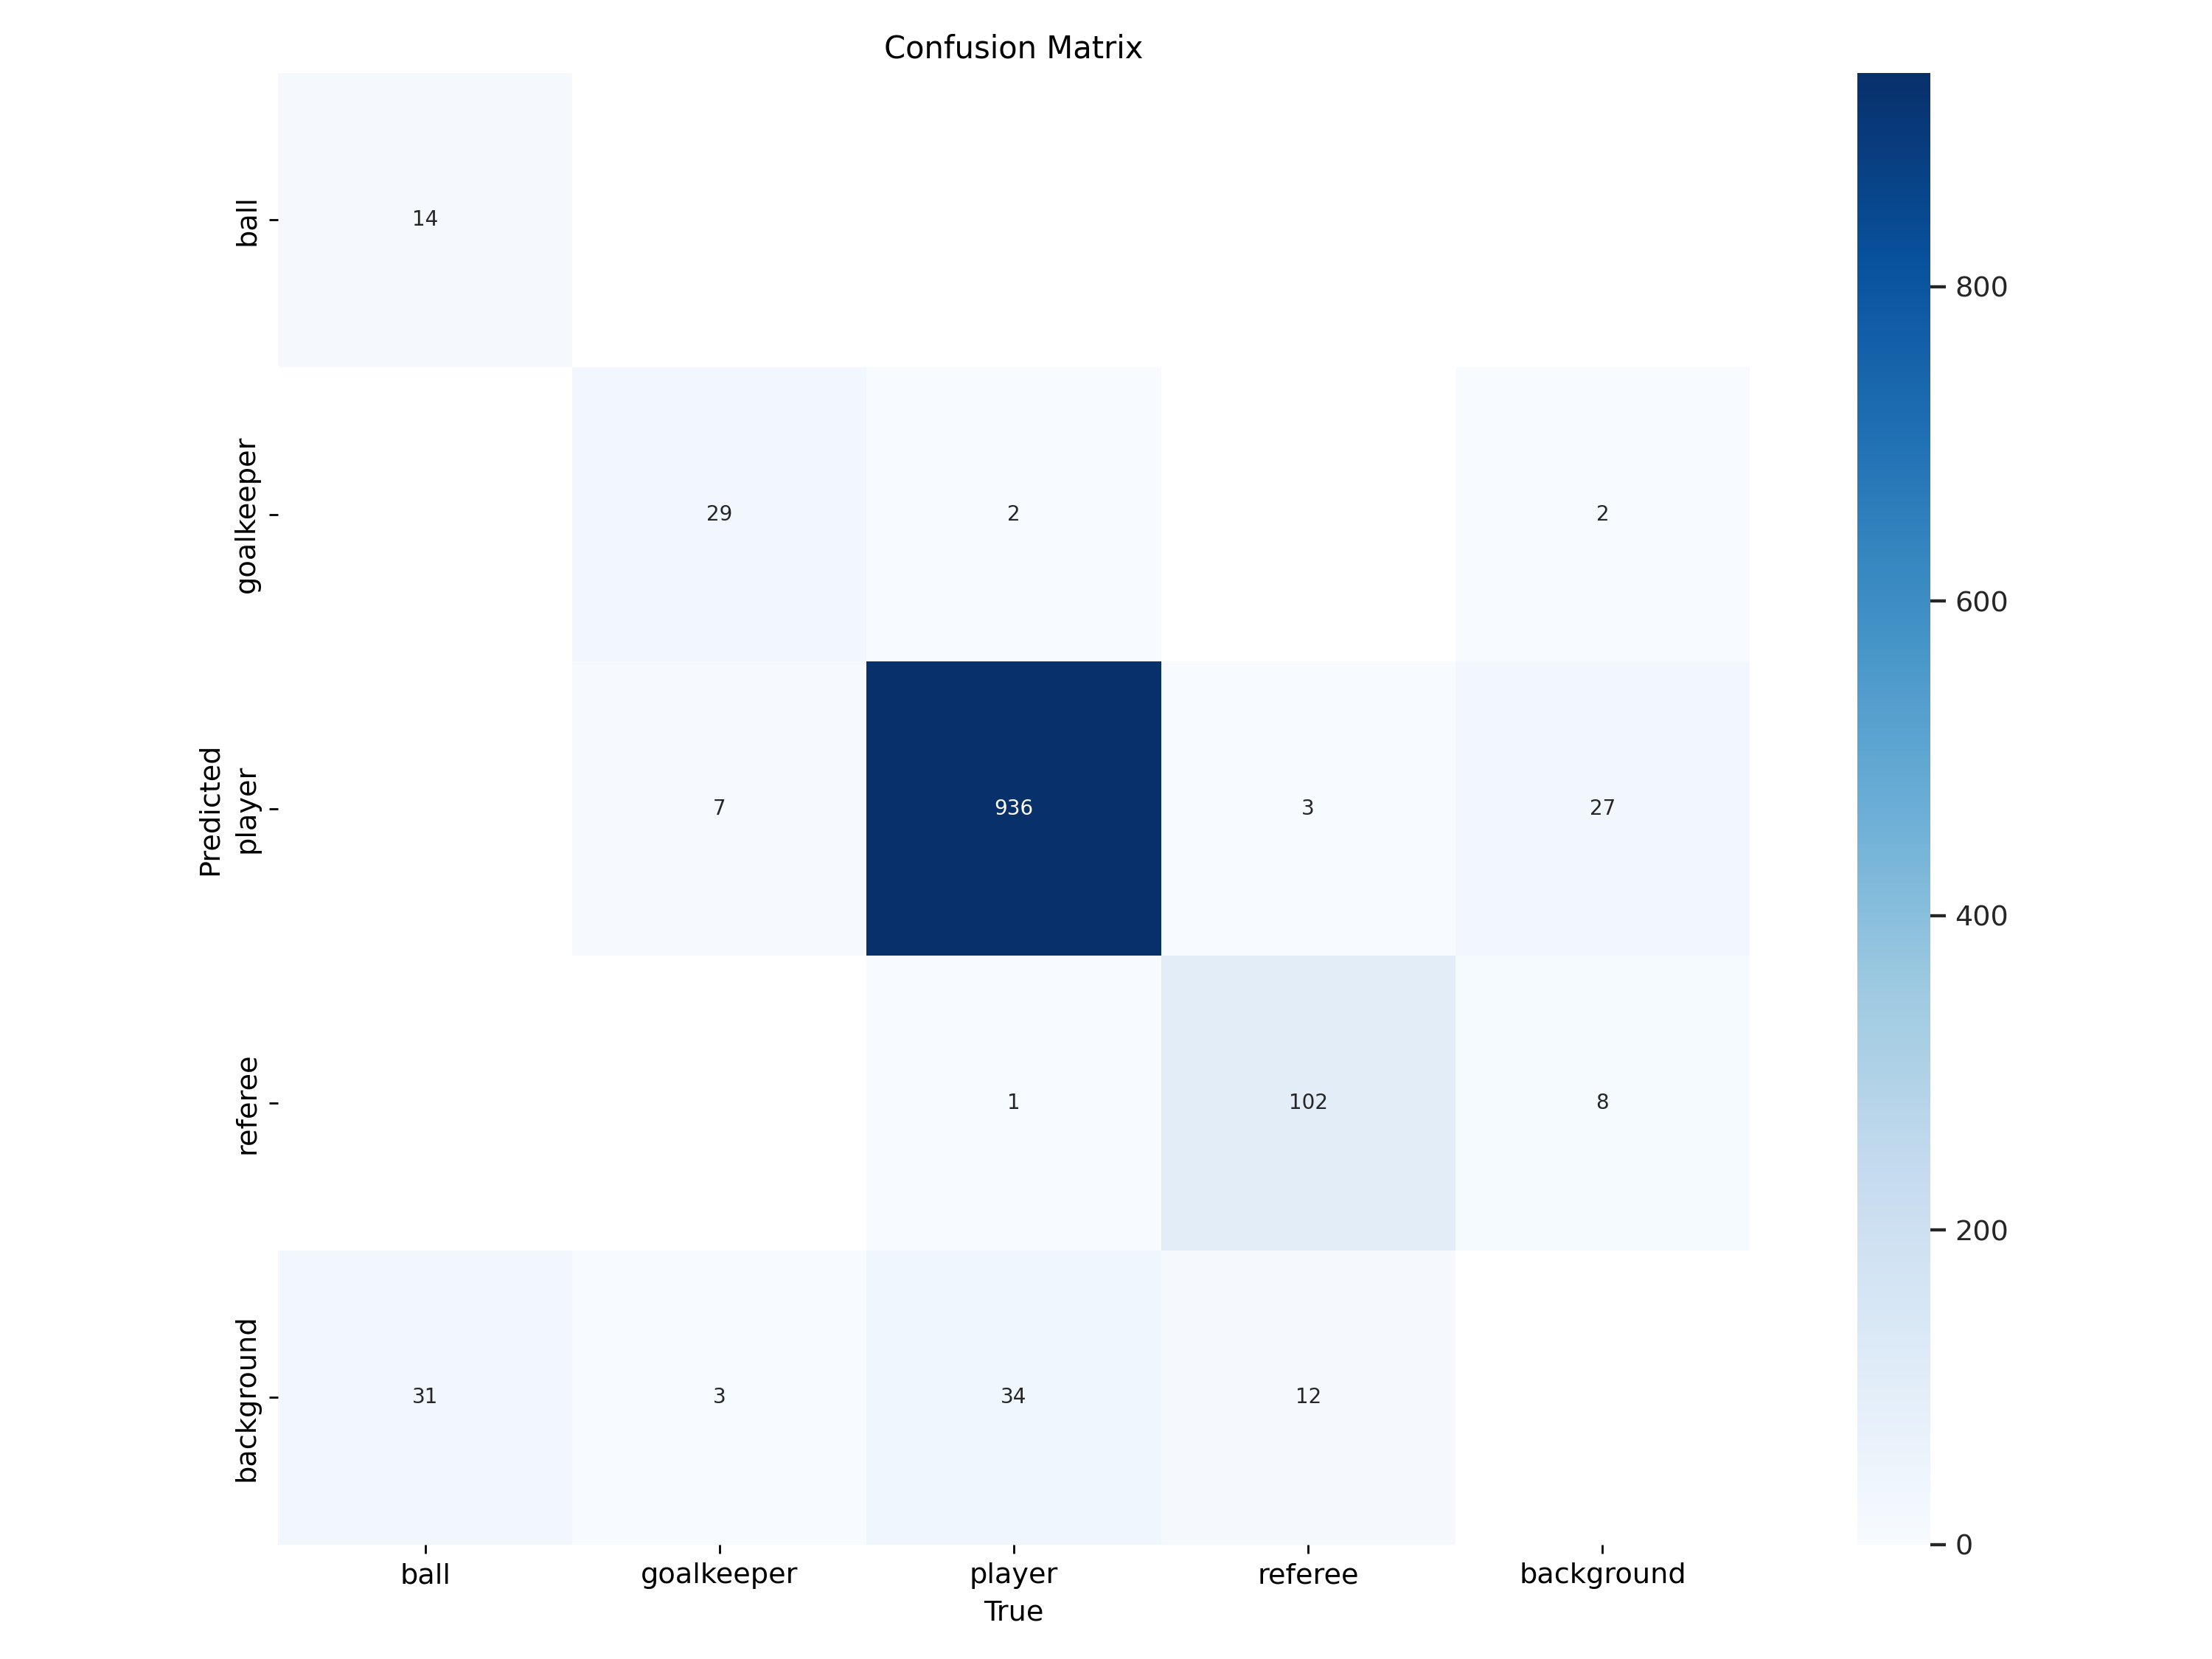

In [30]:
Image(filename="runs/detect/train_640_batch20/val/confusion_matrix.png", width=600)

## Finetune with larger input resolution to enhance ball detection

A 640 input resolution means every image and video frame is rescaled to 640×640 which reduces the pixels by 4–5 times. In the raw image, the ball already occupies only a few pixels and such rescaling further reduces the details which makes detection more difficult.

Increasing the input resolution leads to slower training and inference. The batch size also needs to get adjusted since the input resolution increases the amount of memory needed in training.

In [5]:
os.chdir(HOME)
os.makedirs(f"{HOME}/models/yolo_finetuned_1280imgs_5batch", exist_ok=True)

In [10]:
%%time

model_1280 = YOLO('yolov8x.pt')

results_1280 = model_1280.train(
    data=f"{dataset.location}/data.yaml",
    epochs=50,
    imgsz=1280,
    batch=5,
    plots=True,
    name="train_1280_batch5"
)

New https://pypi.org/project/ultralytics/8.3.197 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.2 torch-2.2.1 CUDA:0 (NVIDIA RTX 4000 Ada Generation, 20145MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/home/abbal179/sports-analytics/code/football-players-detection-11/data.yaml, epochs=50, time=None, patience=100, batch=5, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train_1280_batch5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms

train: Scanning /home/abbal179/sports-analytics/code/football-players-detection-11/train/labels... 298 images, 0 backgrounds, 0 corrupt: 100%|██████████| 298/298 [00:00<00:00, 1323.85it/s]

train: New cache created: /home/abbal179/sports-analytics/code/football-players-detection-11/train/labels.cache



val: Scanning /home/abbal179/sports-analytics/code/football-players-detection-11/valid/labels... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<00:00, 1366.86it/s]

val: New cache created: /home/abbal179/sports-analytics/code/football-players-detection-11/valid/labels.cache


Plotting labels to runs/detect/train_1280_batch5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005078125), 103 bias(decay=0.0)
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to runs/detect/train_1280_batch5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      15.9G      1.009      1.318     0.9206         78       1280: 100%|██████████| 60/60 [00:42<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]

                   all         49       1174     0.0221      0.242     0.0151     0.0118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      16.9G     0.9981     0.8549     0.9214        108       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.627      0.626      0.613      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      16.6G      1.063      0.902     0.9537        100       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]

                   all         49       1174      0.295      0.552      0.323      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50        17G      1.003      1.016     0.9519         35       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]

                   all         49       1174      0.527      0.484      0.373      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      16.8G      1.194     0.7706     0.9721        154       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]

                   all         49       1174      0.499      0.585      0.399      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50        17G      1.003     0.6702     0.9285         45       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.844      0.751      0.791      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      17.1G     0.9538     0.6625     0.9156         70       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.824      0.768      0.798      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      16.5G       0.94     0.6507      0.924         84       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.832      0.777      0.823      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      16.8G     0.8753     0.5458     0.9014         72       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.929      0.762      0.858      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      17.1G     0.8313     0.4934     0.8948         77       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.908      0.788      0.856      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      17.1G     0.8608     0.5031     0.8927         59       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.869      0.779      0.852      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      16.8G     0.8597     0.5104     0.8961         72       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.773      0.814      0.793      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      16.7G     0.8278      0.486     0.8752         85       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.899      0.786      0.869      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      17.1G     0.7957      0.438     0.8719        151       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.882      0.822      0.863      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      17.1G     0.7977     0.4432     0.8814         46       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.903      0.828      0.874      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      16.8G     0.7688     0.4215     0.8624         69       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174       0.92       0.83      0.867      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      16.9G     0.7627     0.4209     0.8635        124       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.878      0.837       0.87      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      16.7G     0.7603     0.4168     0.8666         55       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.886      0.823      0.878      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      17.1G     0.7497     0.4088     0.8714         98       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.868       0.83      0.872      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      16.9G     0.7596     0.4058     0.8625        102       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.898      0.843      0.888      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      16.8G     0.7517     0.3982     0.8639         83       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.892      0.848      0.893      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      16.9G     0.7454     0.3953     0.8522         71       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.858      0.828       0.87      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      16.8G     0.7879      0.401     0.8663        119       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.912      0.815      0.878      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      16.9G     0.8519     0.4357     0.8727        140       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.901      0.823       0.89      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      16.9G     0.7967     0.4082     0.8668         51       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.923      0.824      0.884      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      16.9G     0.7617     0.3978     0.8586         87       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.897      0.839      0.883      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      16.8G      0.734      0.391     0.8541         94       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.899      0.866      0.897      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      17.1G     0.7137     0.3683      0.854         91       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.913      0.834      0.895      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      16.8G     0.7273     0.3797     0.8526         50       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.941      0.827        0.9      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      16.9G     0.7084     0.3688     0.8543         67       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.855      0.862      0.903      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      17.1G      0.713     0.3713     0.8553         67       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.927      0.829      0.891      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      17.1G     0.7306     0.3783     0.8515         76       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.943      0.838      0.898      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      16.7G     0.7204     0.3797     0.8489         95       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.907      0.813      0.887      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      17.2G      0.701     0.3692     0.8477         67       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.913       0.85       0.89       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50        17G     0.6764      0.357     0.8433        105       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.917      0.841      0.895      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      17.1G     0.6922     0.3558     0.8433         99       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.907      0.845      0.894      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      16.7G     0.6735     0.3448     0.8374         29       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.948      0.832      0.896      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      16.9G     0.6693     0.3451     0.8374         37       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.855      0.882        0.9      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      16.7G     0.6827     0.3494     0.8394        130       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.918      0.863        0.9      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      16.9G     0.6816     0.3524     0.8379         73       1280: 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174       0.93      0.878      0.901      0.647


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50        17G     0.6313       0.32     0.8464         69       1280: 100%|██████████| 60/60 [00:41<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.948       0.86      0.899      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      16.8G     0.6201      0.312     0.8386         72       1280: 100%|██████████| 60/60 [00:41<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.941      0.846      0.891      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50        17G     0.6153     0.3094      0.838         67       1280: 100%|██████████| 60/60 [00:41<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.922      0.848      0.898      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50        17G     0.6179     0.3091     0.8429         72       1280: 100%|██████████| 60/60 [00:41<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.947      0.822      0.897      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50        17G     0.6147     0.3106     0.8267         69       1280: 100%|██████████| 60/60 [00:41<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.913      0.832      0.898      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50        17G     0.6179     0.3041     0.8351         72       1280: 100%|██████████| 60/60 [00:41<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.864      0.872      0.897      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      17.1G     0.6072     0.3015     0.8354         66       1280: 100%|██████████| 60/60 [00:41<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.879      0.887      0.888      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50        17G     0.6037     0.2951     0.8392         67       1280: 100%|██████████| 60/60 [00:41<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.889      0.883      0.899      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50        17G     0.5913     0.2915     0.8306         71       1280: 100%|██████████| 60/60 [00:41<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.918      0.868      0.903      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50        17G       0.59     0.2885     0.8324         68       1280: 100%|██████████| 60/60 [00:41<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all         49       1174      0.894      0.887      0.906      0.659



50 epochs completed in 0.780 hours.
Optimizer stripped from runs/detect/train_1280_batch5/weights/last.pt, 136.9MB
Optimizer stripped from runs/detect/train_1280_batch5/weights/best.pt, 136.9MB

Validating runs/detect/train_1280_batch5/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.12.2 torch-2.2.1 CUDA:0 (NVIDIA RTX 4000 Ada Generation, 20145MiB)
Model summary (fused): 268 layers, 68,127,420 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


                   all         49       1174      0.896      0.887      0.906      0.662
                  ball         45         45      0.824      0.667      0.704      0.347
            goalkeeper         38         39      0.869      0.923      0.949      0.748
                player         49        973      0.961      0.992      0.994      0.837
               referee         49        117      0.931      0.966      0.976      0.718
Speed: 0.4ms preprocess, 52.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train_1280_batch5
CPU times: user 30min 43s, sys: 7min 42s, total: 38min 26s
Wall time: 47min 8s


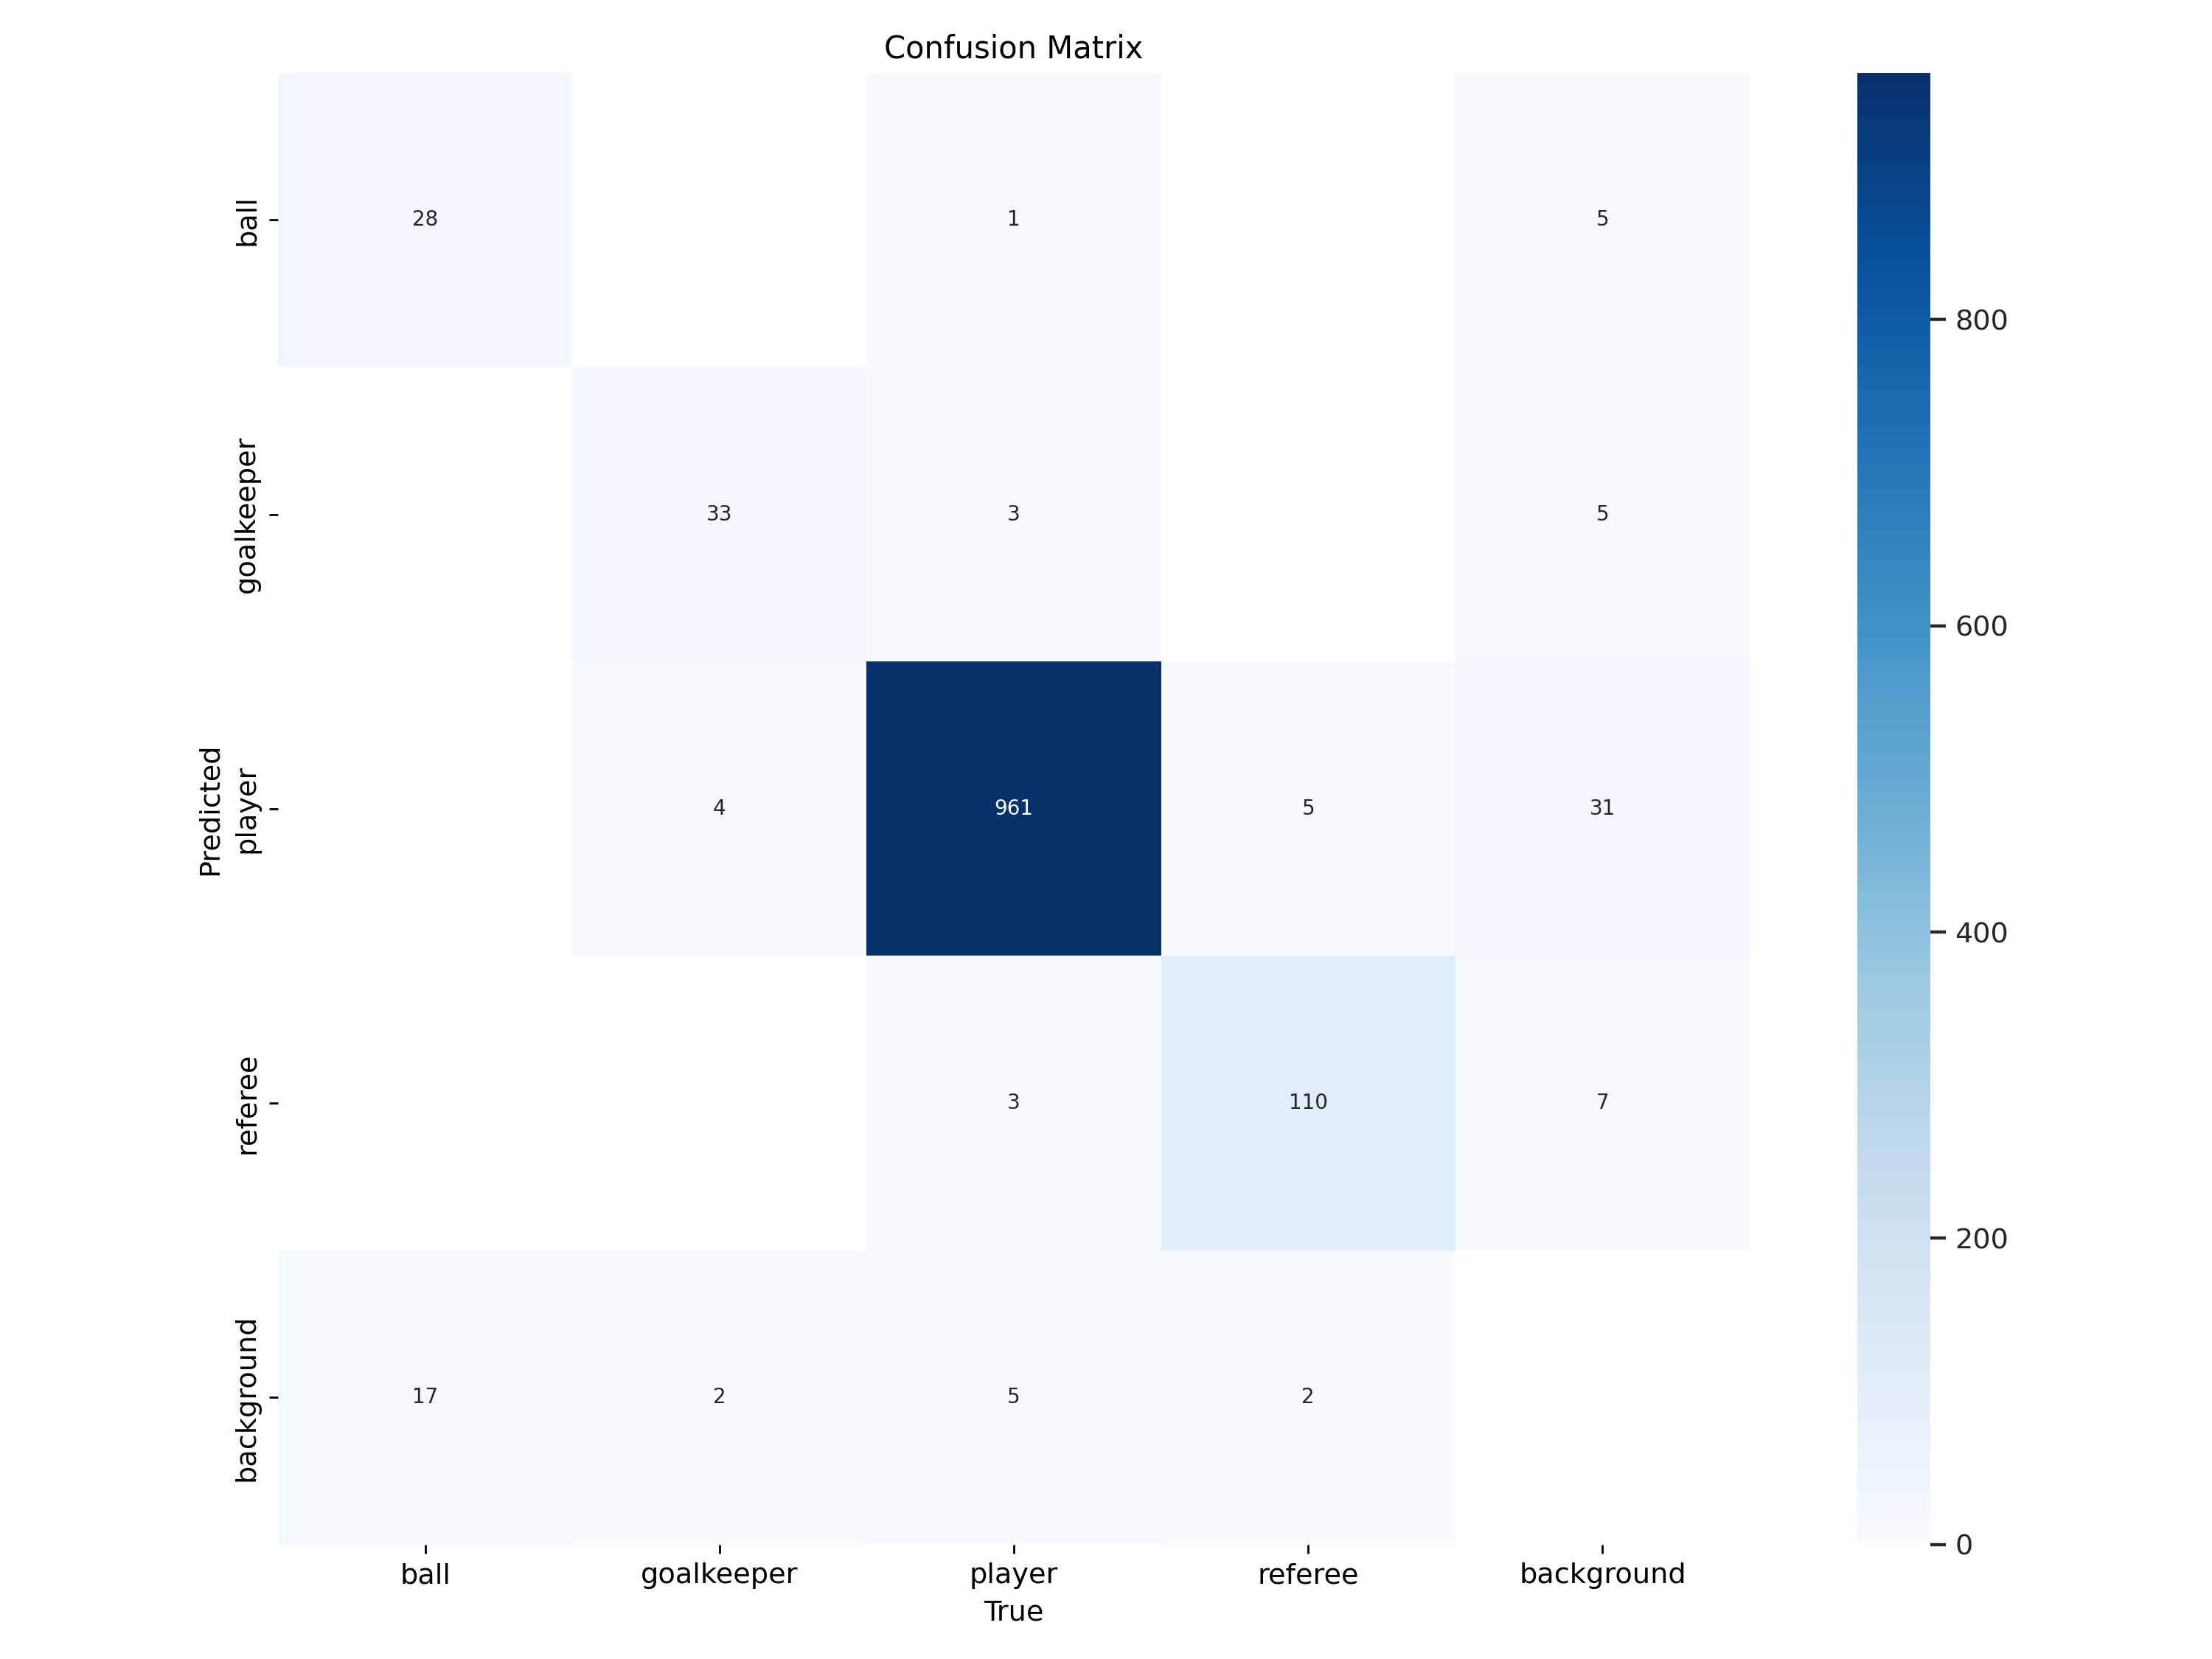

In [11]:
Image(filename="runs/detect/train_1280_batch5/confusion_matrix.png", width=600)

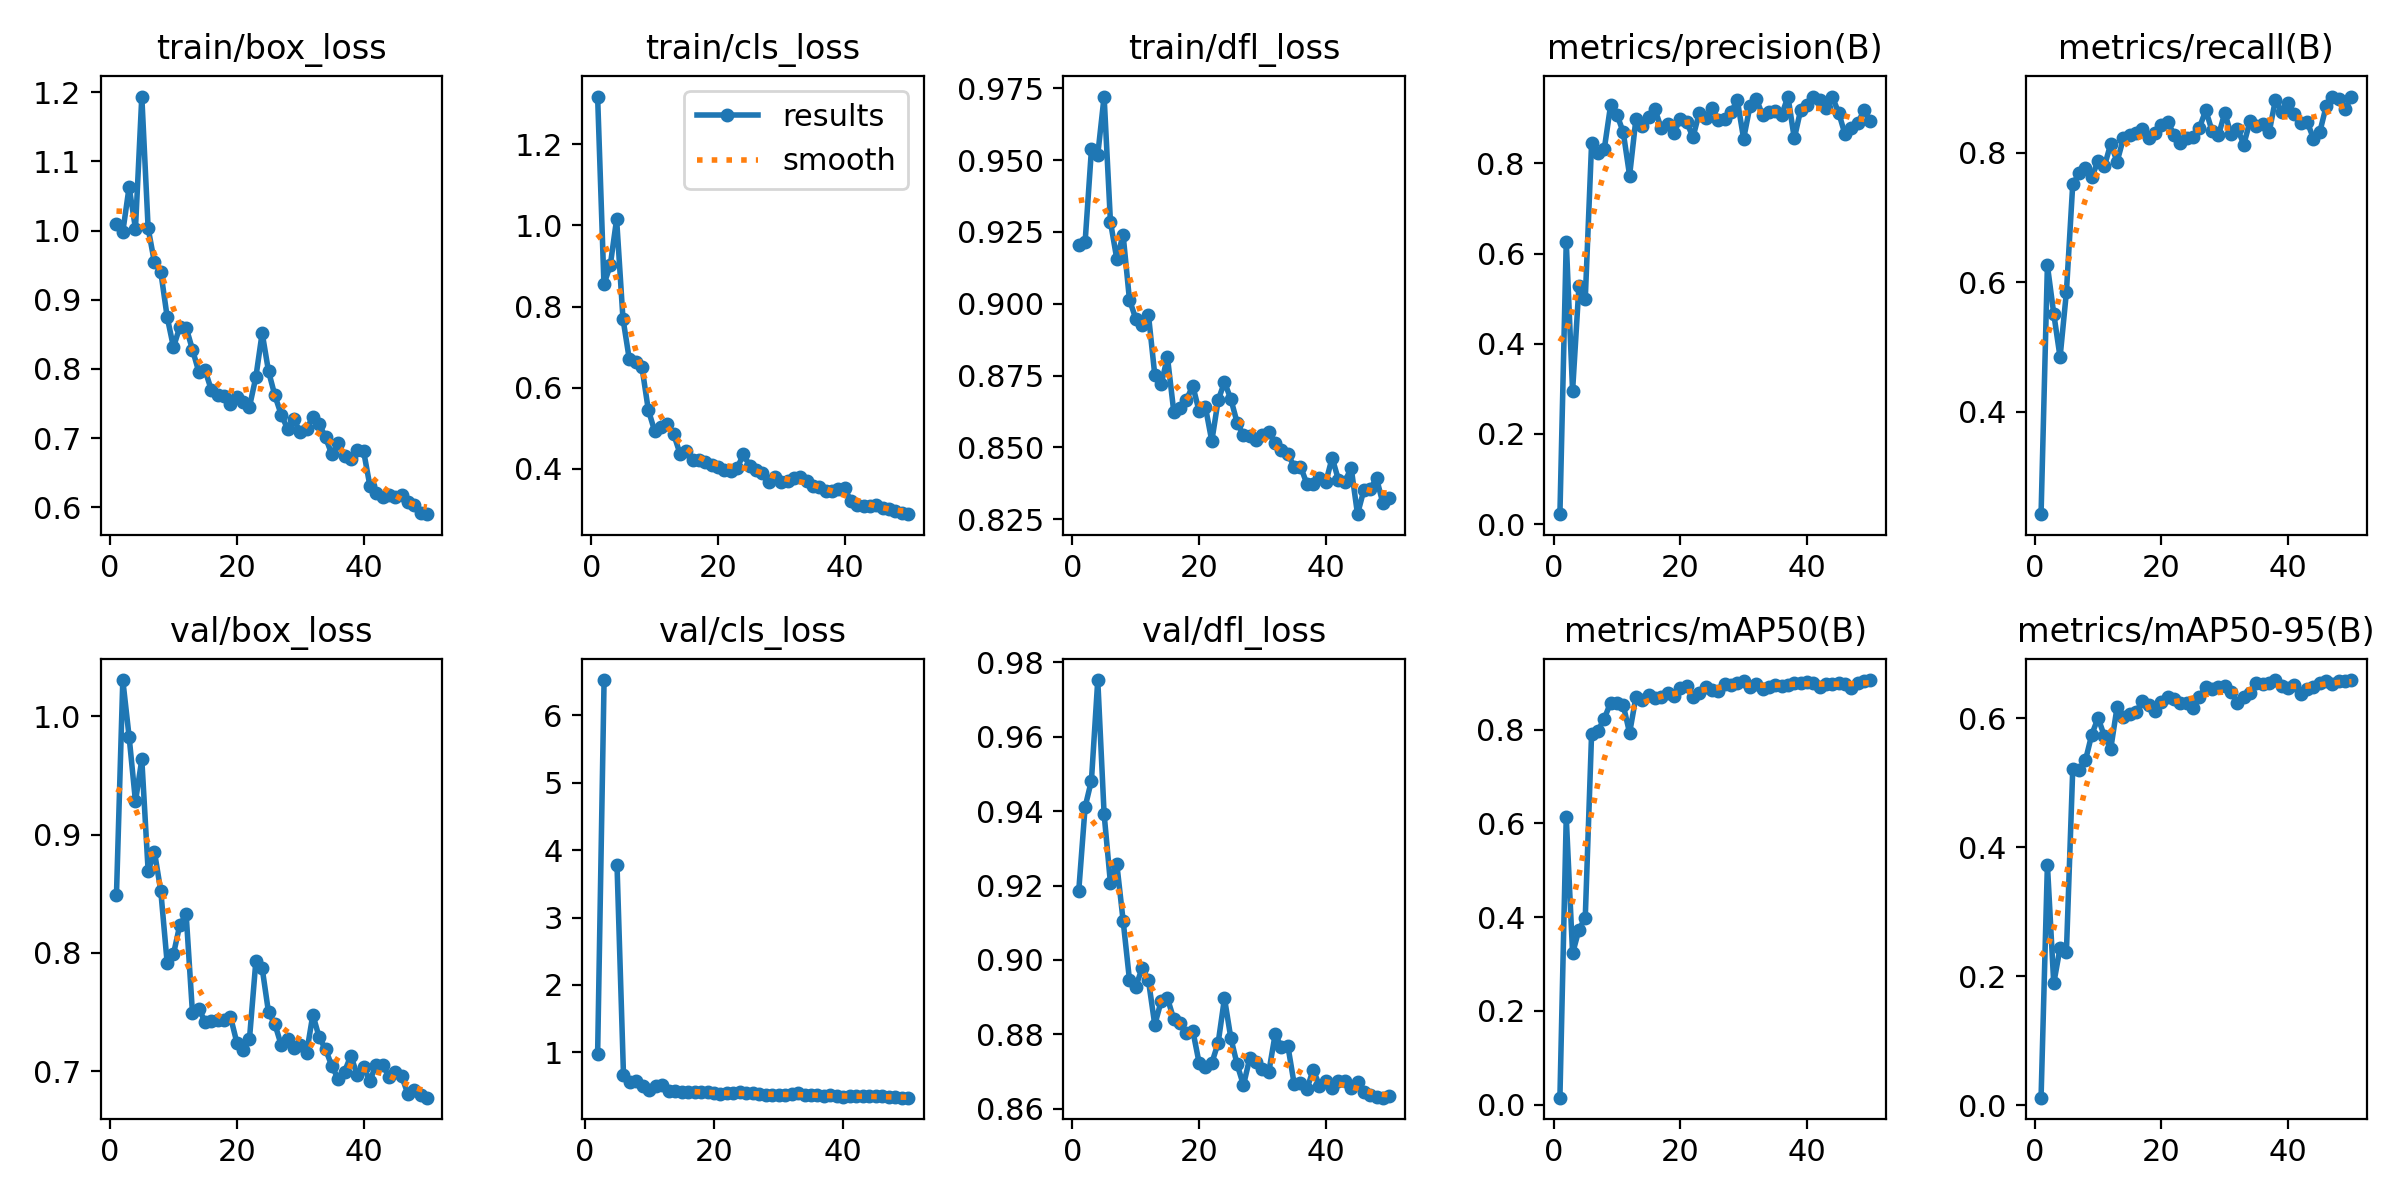

In [12]:
Image(filename="runs/detect/train_1280_batch5/results.png", width=600)

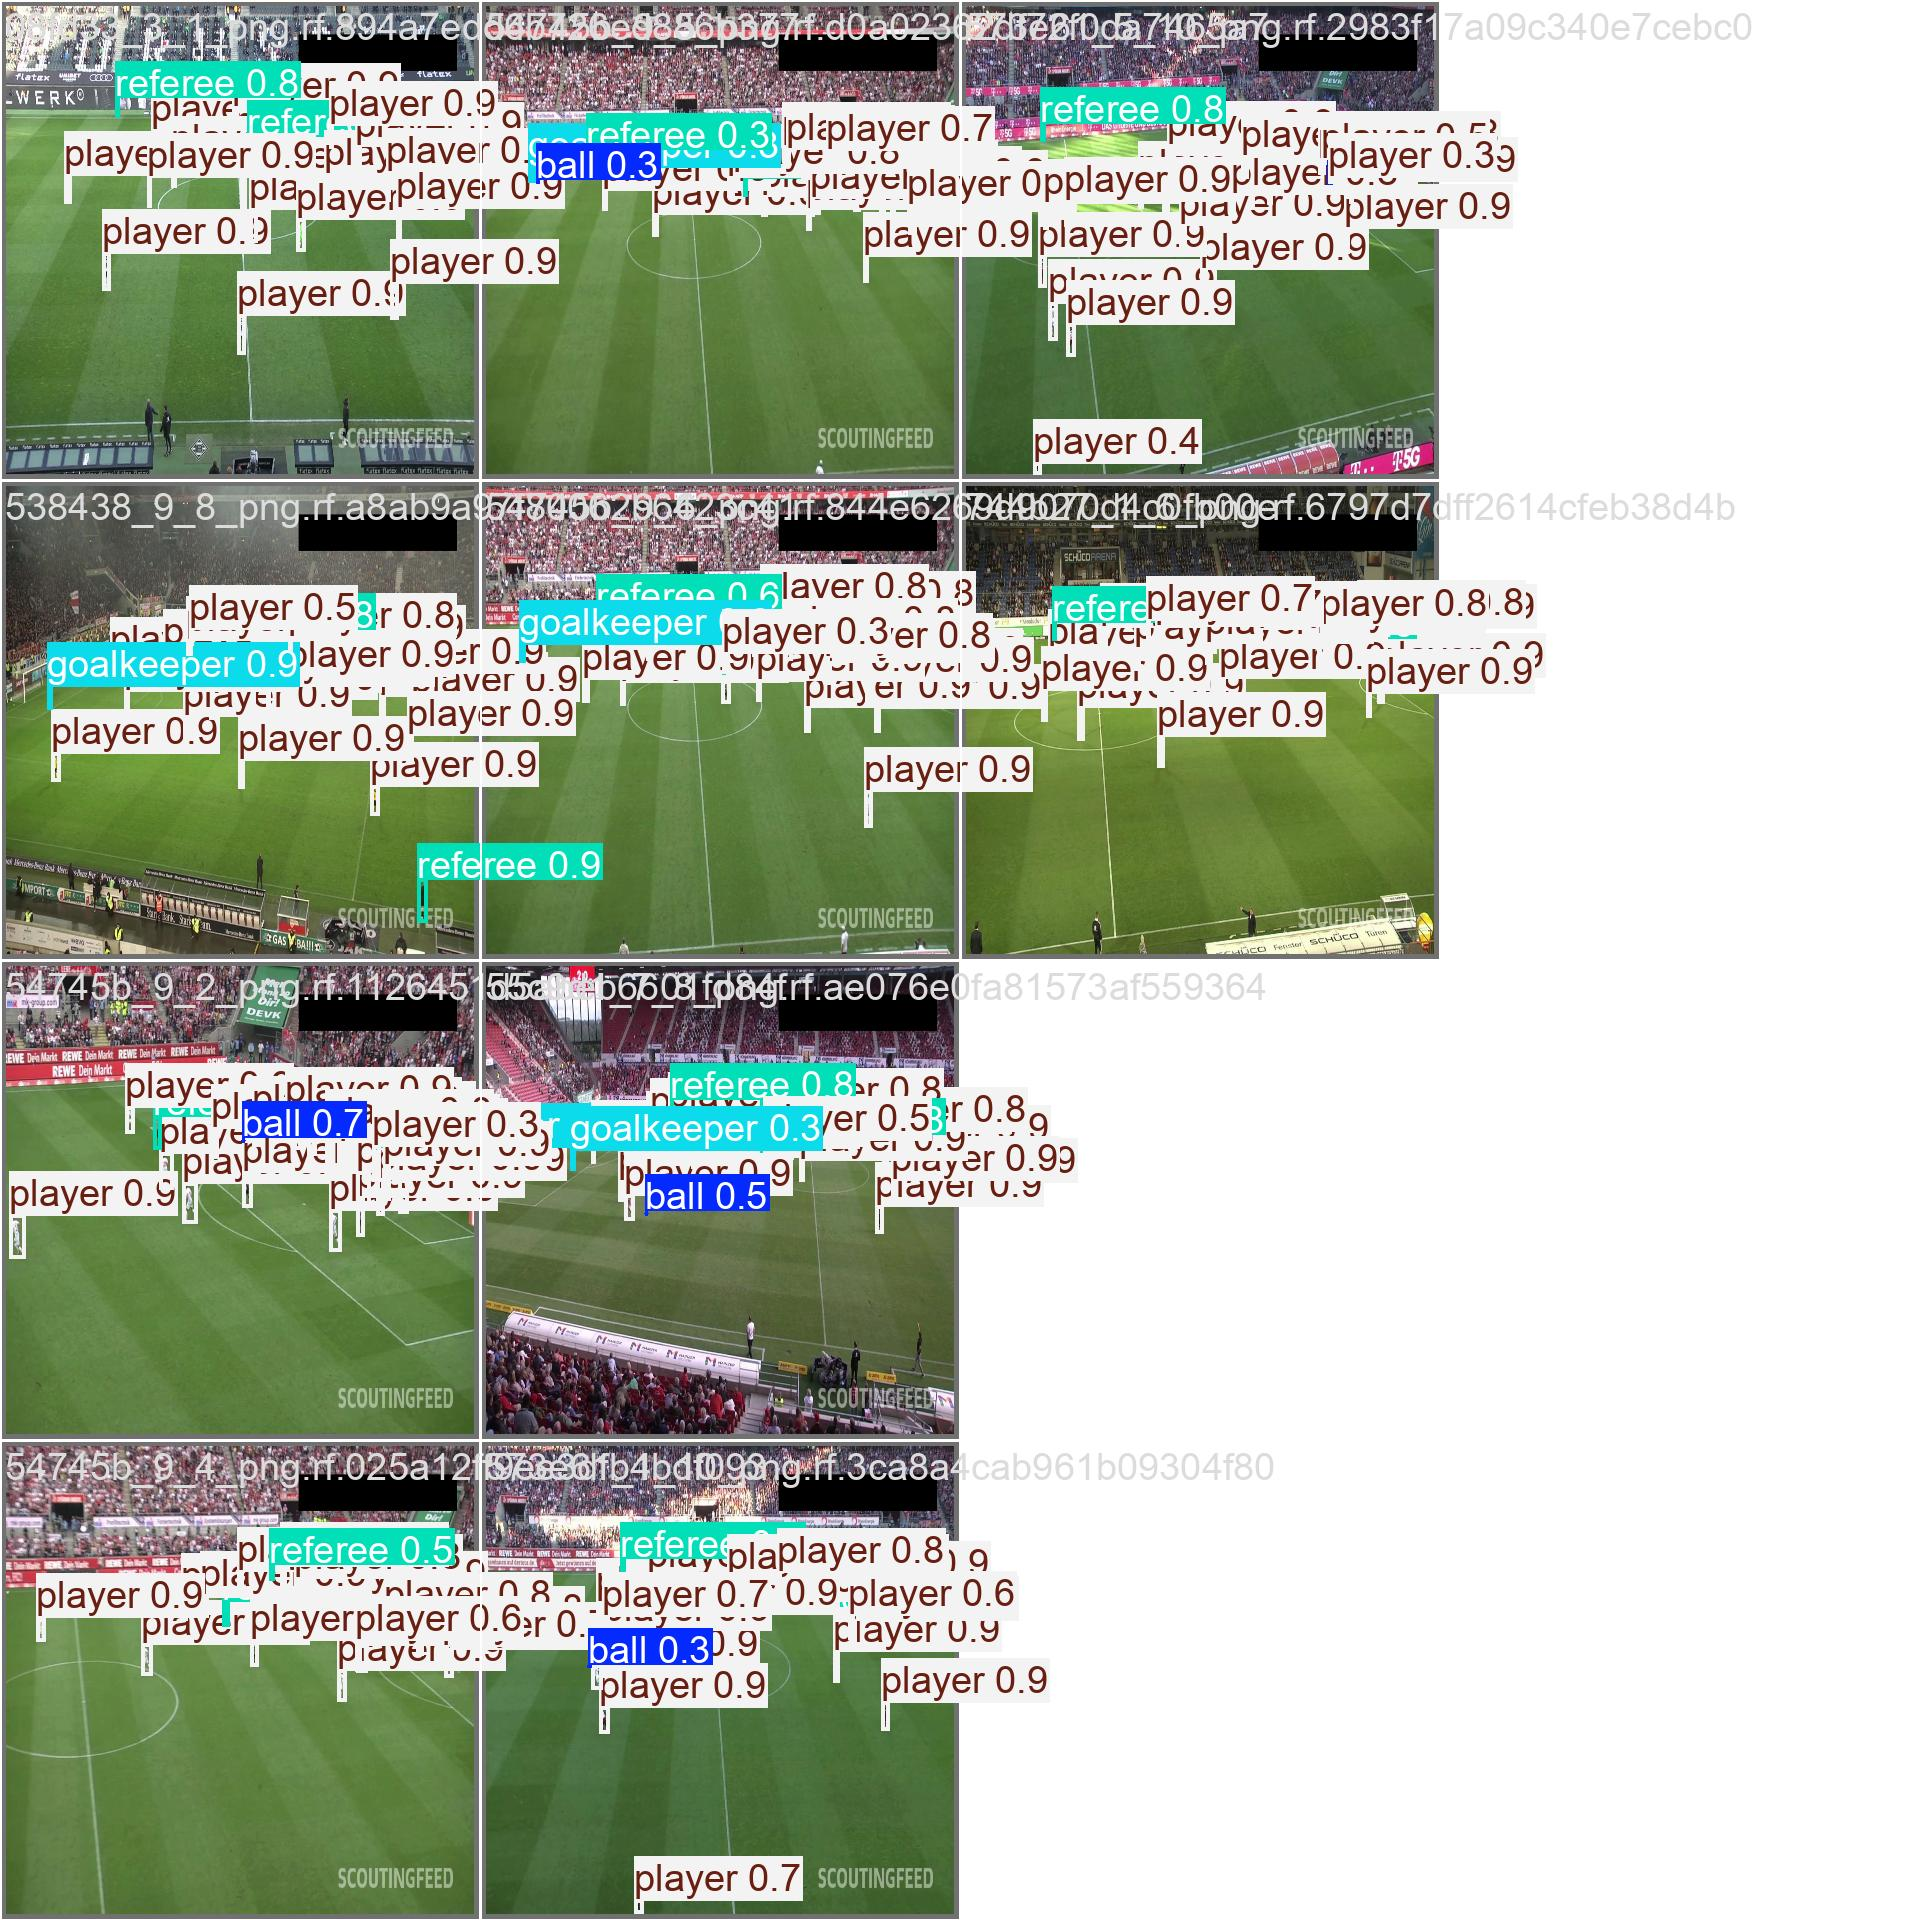

In [13]:
Image(filename="runs/detect/train_1280_batch5/val_batch0_pred.jpg", width=600)

### Save model

In [14]:
!cp runs/detect/train_1280_batch5/weights/best.pt models/yolo_finetuned_1280imgs_5batch/best.pt

## Validate finetuned model

In [16]:
model_1280_val = YOLO("models/yolo_finetuned_1280imgs_5batch/best.pt")

val_results_1280 = model_1280_val.val(
    data=f"{dataset.location}/data.yaml",
    imgsz=1280,
    name="train_1280_batch20/val"
)

Ultralytics 8.3.40 🚀 Python-3.12.2 torch-2.2.1 CUDA:0 (NVIDIA RTX 4000 Ada Generation, 20145MiB)
Model summary (fused): 268 layers, 68,127,420 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /home/abbal179/sports-analytics/code/football-players-detection-11/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


                   all         49       1174        0.9      0.887      0.908      0.682
                  ball         45         45      0.839      0.667      0.714      0.368
            goalkeeper         38         39      0.867      0.923      0.949      0.767
                player         49        973      0.963      0.992      0.995      0.858
               referee         49        117       0.93      0.966      0.976      0.735
Speed: 0.9ms preprocess, 76.7ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train_1280_batch20/val


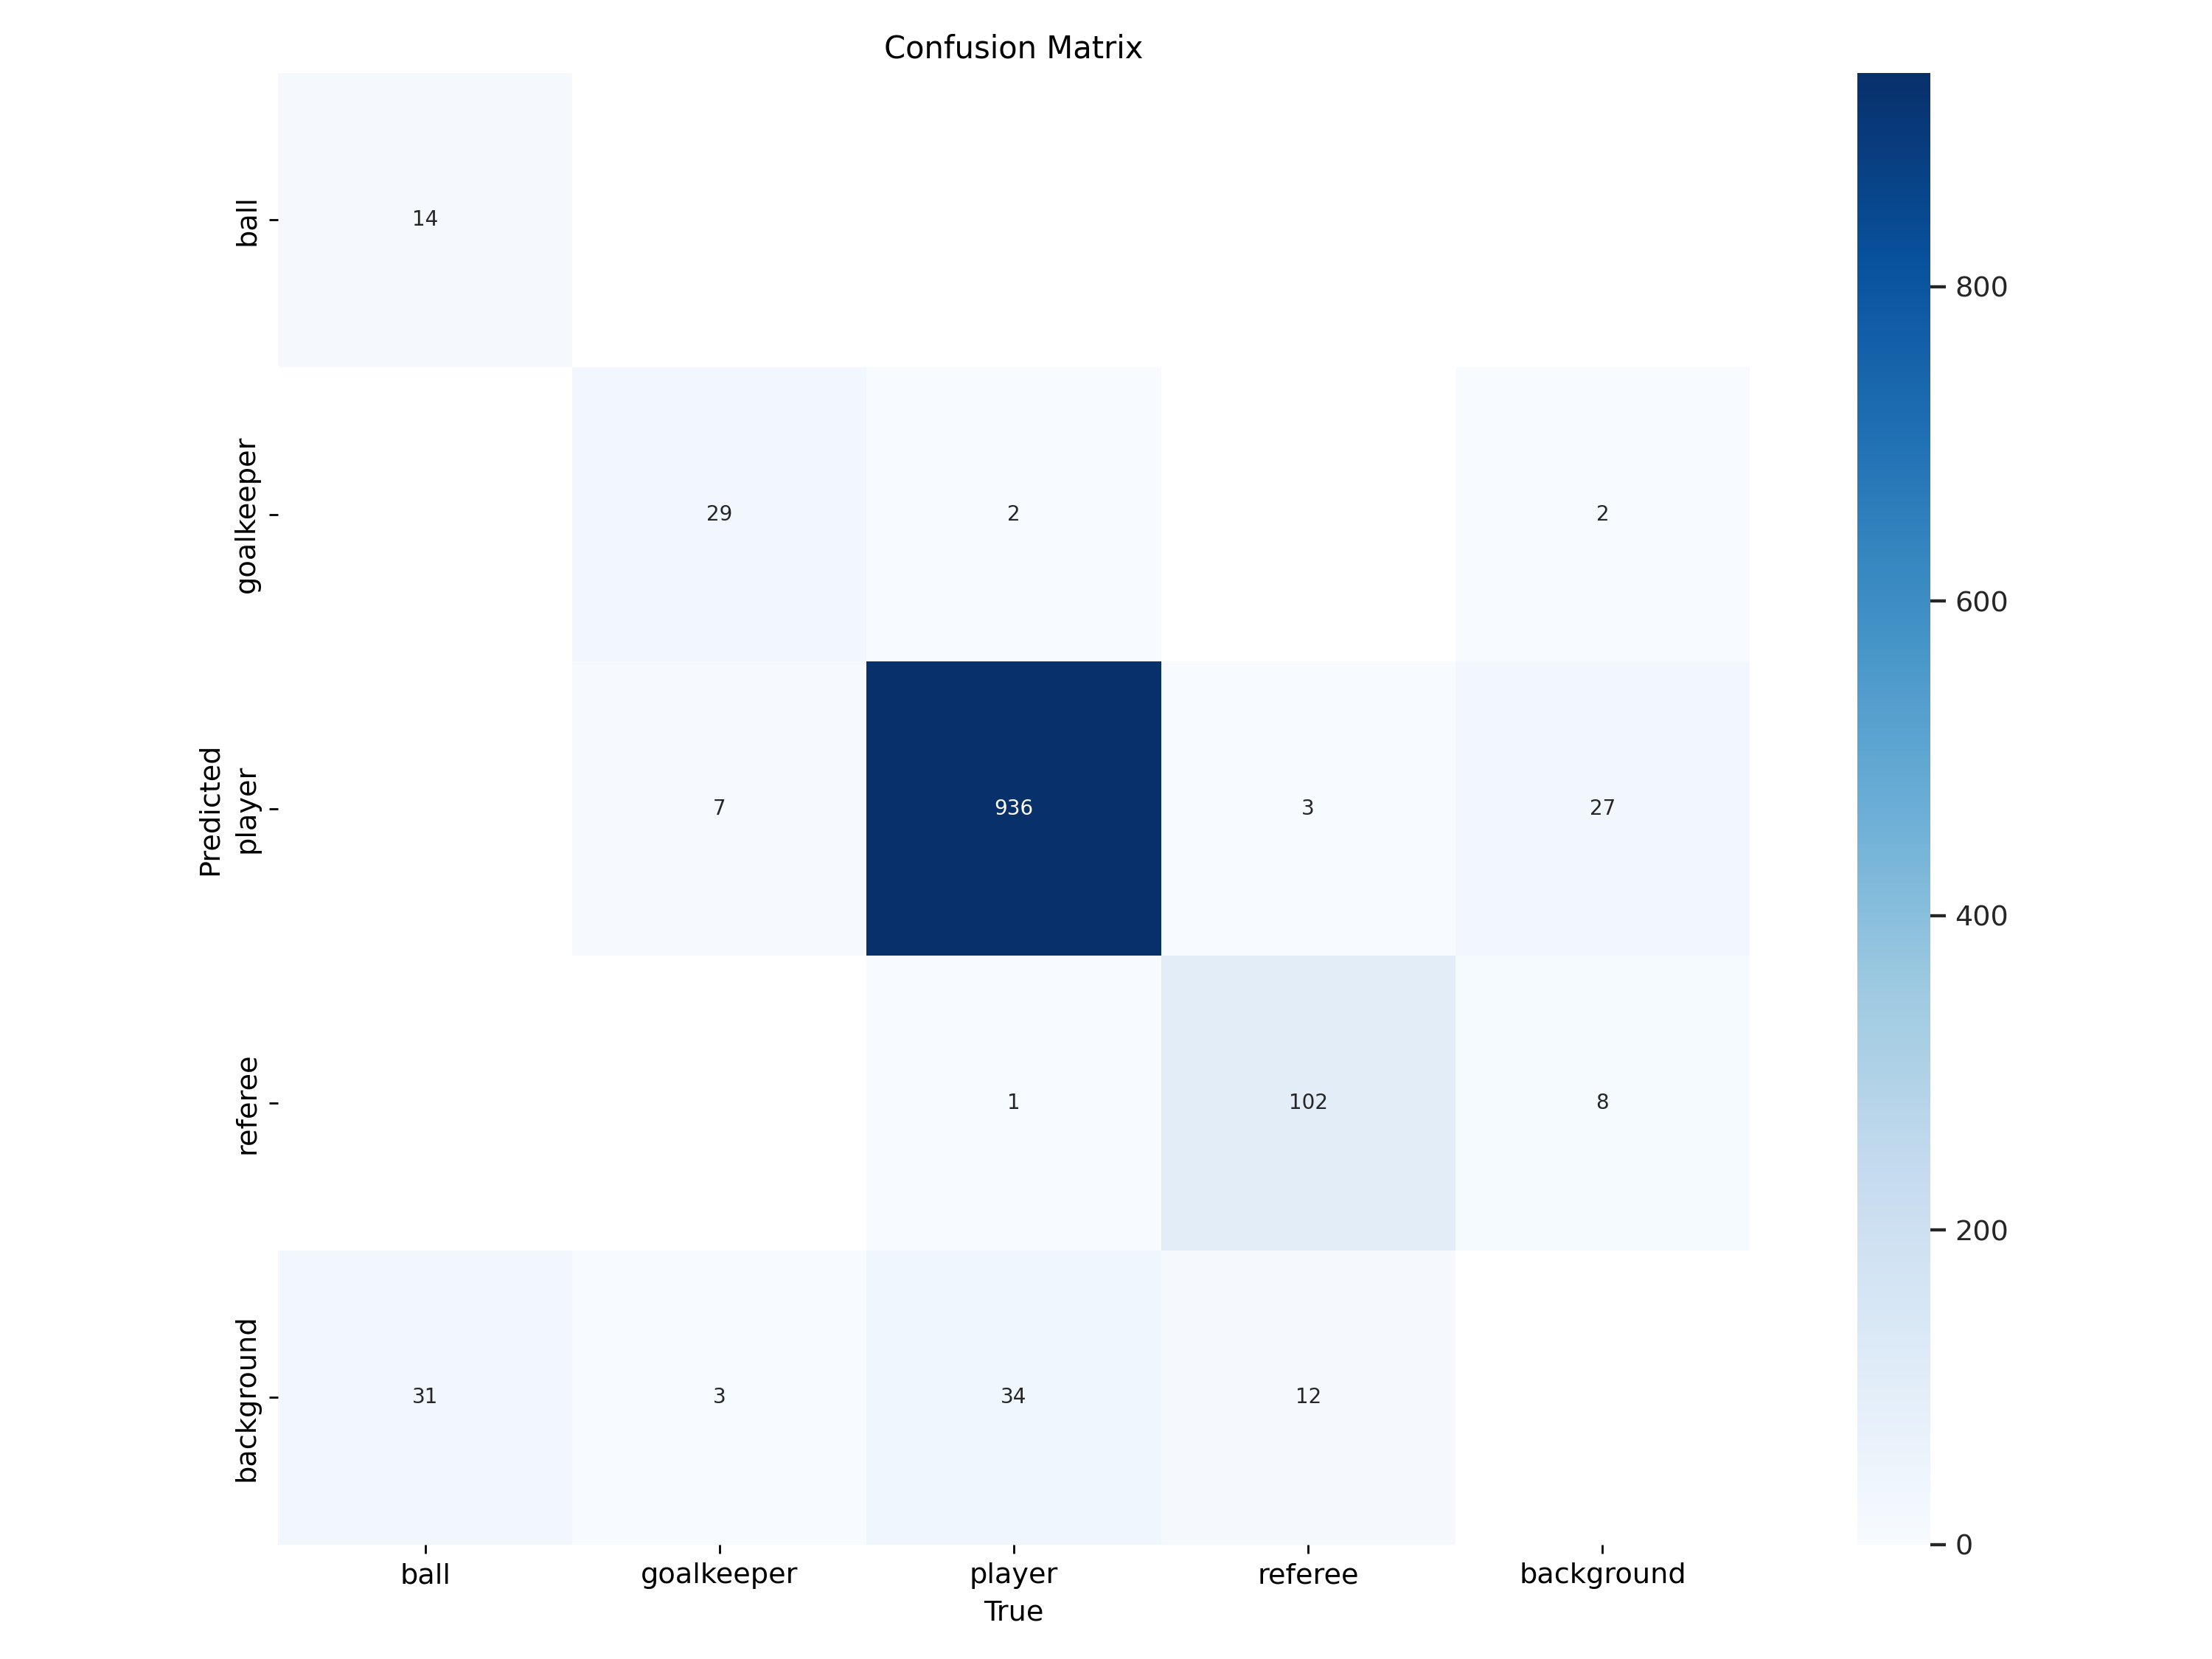

In [17]:
Image(filename="runs/detect/train_640_batch20/val/confusion_matrix.png", width=600)